In [ ]:
import pandas as pd

In [ ]:
a = pd.read_csv("dic.csv")

In [ ]:
a[a.position == "occipital gyri"].channel.values

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.io import loadmat
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
from tqdm import tqdm

In [2]:
filename = "0903-1-5-rawdata.mat"
datadir = "../../Data/"
resultdir = "../../Result/"
data = loadmat(os.path.join(datadir, "compact"+filename))
channels = data["channels"]
cue_onset = data["cue_onset"][0,:]
times = data["times"][0,:]

fs = 2000

review_bandpass = False
review_latency = True

In [3]:
def split_datawithmarker(data, marker, roi, fs):
    groupdata = np.zeros((len(marker), (roi[1]-roi[0])*fs))
    
    for idx, each in enumerate(marker):
        groupdata[idx, :] = data[(int(each)+roi[0])*fs:(int(each)+roi[1])*fs]
    
    return groupdata

In [4]:
ch_split = split_datawithmarker(channels[98,:], cue_onset, (-2, 5), fs)

In [5]:
import stfft

In [9]:
%time p,t = stfft.stfft(ch_split, stfft.hantaper, 150, 140, fs)

/usr/local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


CPU times: user 4.17 s, sys: 140 ms, total: 4.31 s
Wall time: 4.32 s


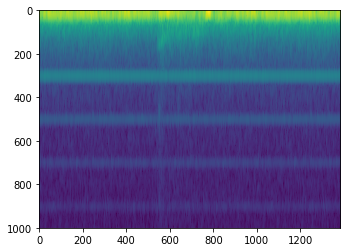

In [10]:
plt.imshow(np.mean(p,0))